In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from pandas import DataFrame
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

# XGBoost
Costruiamo un modello usando la libreria XGBoost e dei parametri indicati per le tipologie di task simile al nostro

In [2]:
XGBModel = XGBRegressor(learning_rate=0.05,
                   n_estimators=2100,
                   max_depth=2,
                   min_child_weight=2,
                   gamma=0,
                   subsample=0.65,
                   colsample_bytree=0.46,
                   nthread=-1,
                   scale_pos_weight=1,
                   reg_alpha=0.464,
                   reg_lambda=0.8571,
                   random_state=7,
                   n_jobs=-1,
                   tree_method='gpu_hist',
                   gpu_id=0)

XGBModel.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.46,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=2100, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, predictor='auto', ...)

In [3]:
test_pre = XGBModel.predict(X_test)
train_pre = XGBModel.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 169538696.737
Test MSE: 638872564.944
Train R^2: 0.972
Test R^2: 0.920


Text(0, 0.5, 'Sale_Price')

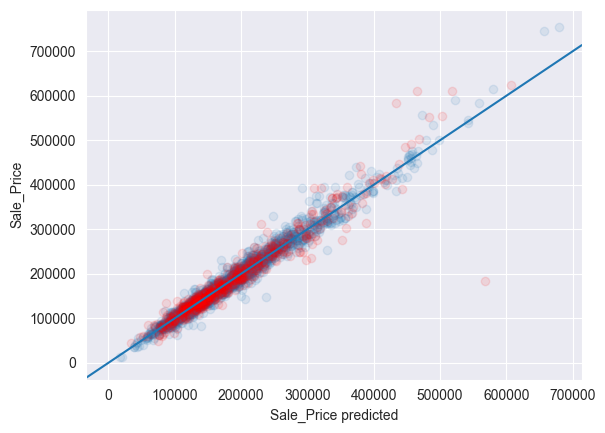

In [4]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

Come possiamo vedere il risultato ottenuto è molto soddisfacente

## Indaghiamo le previsioni ottenute dal modello
Andiamo ora ad analizzare le previsioni ottenute tramite il modello per cercare di capire come andare a migliorarlo

In [5]:
pred = np.exp(test_pre.tolist())
real = np.exp(Y_test.to_numpy().tolist())

errors = [float(pred[i]) - float(real[i]) for i in range(len(pred))]
errors = np.abs(errors)
errors

array([9.74693459e+02, 8.72029881e+03, 1.19740281e+04, 3.45164036e+03,
       1.28947516e+04, 4.77865088e+03, 5.16981044e+04, 4.32704692e+03,
       6.79639044e+03, 1.15663377e+04, 5.25216811e+03, 7.05006272e+03,
       2.45285843e+03, 1.22200259e+04, 2.06174844e+03, 5.03899618e+03,
       6.51478524e+03, 9.16637134e+02, 4.89175153e+03, 7.96496470e+03,
       1.12819968e+04, 2.35702944e+03, 1.01832683e+04, 1.17909830e+04,
       1.43394663e+04, 8.76336586e+03, 7.19988879e+04, 2.49759159e+04,
       3.78156239e+03, 1.42429579e+04, 5.23588592e+03, 3.64752262e+03,
       2.53523850e+04, 9.07180263e+03, 2.05107969e+04, 7.40574522e+03,
       1.19661399e+04, 3.94379958e+04, 5.96661705e+03, 2.68155940e+03,
       7.93742900e+03, 6.03661969e+03, 1.72995503e+04, 2.94837785e+03,
       1.27837122e+04, 1.63264509e+04, 2.12807382e+04, 4.93522870e+03,
       1.99813595e+04, 1.01999072e+04, 2.72943595e+04, 6.36341298e+03,
       3.45100355e+03, 3.87345198e+03, 1.25871038e+04, 7.61868423e+02,
      

Mean error: 13380.610
# test instances: 586, # instances over the mean: 182


Text(0, 0.5, 'Sale_Price')

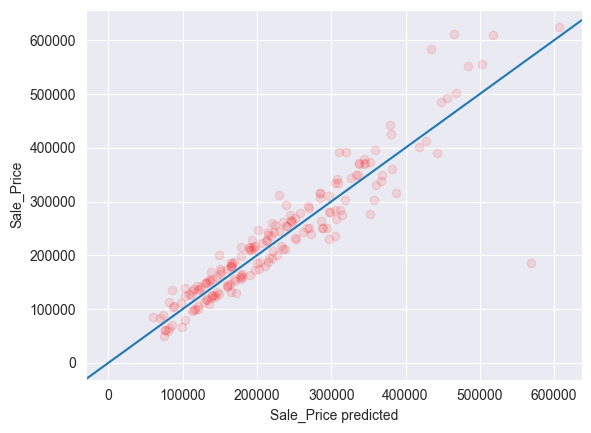

In [6]:
mean_error = np.mean(errors)
print("Mean error: {:.3f}".format(mean_error))

indexes = [i for i, v in enumerate(errors) if v > mean_error]
print("# test instances: {:d}, # instances over the mean: {:d}".format(len(errors), len(indexes)))

fig, axs = plt.subplots()
# axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(pred[indexes], real[indexes], 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

Dal grafico si può notare che le istanze predette peggio della media si distribuiscono in maniera più o meno uniforme, quanto meno sino a una certa soglia di prezzo; l’aumentare dell’errore per proprietà il cui prezzo di vendita supera circa i 400000 USD è probabilmente motivato dal fatto che il dataset contiene poche istanze di questo tipo, rendendole poco rappresentate e pertanto più difficili da predire.
Eseguiamo ora la stessa analisi anche per il train set.

In [7]:
pred = np.exp(train_pre.tolist())
real = np.exp(Y_train.to_numpy().tolist())

errors = [float(pred[i]) - float(real[i]) for i in range(len(pred))]
errors = np.abs(errors)
errors

array([12581.45197581,   184.24393061,   322.18115659, ...,
        2830.89779385,  3490.64384745,   246.82875975])

Mean error: 8882.954
# test instances: 2342, # instances over the mean: 836


Text(0, 0.5, 'Sale_Price')

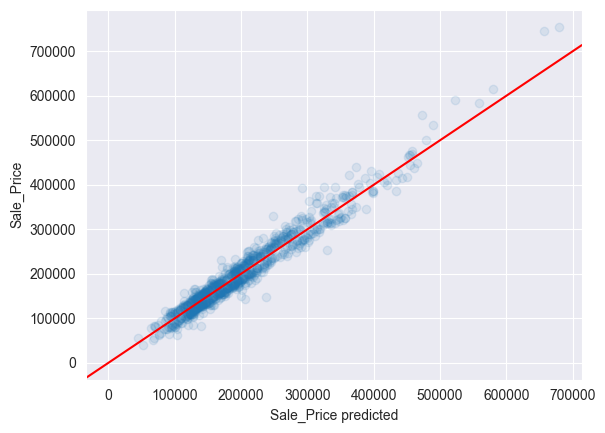

In [8]:
mean_error = np.mean(errors)
print("Mean error: {:.3f}".format(mean_error))

indexes = [i for i, v in enumerate(errors) if v > mean_error]
print("# test instances: {:d}, # instances over the mean: {:d}".format(len(errors), len(indexes)))

fig, axs = plt.subplots()
# axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(pred[indexes], real[indexes], 'o', alpha=0.1)
axs.axline((0, 0), slope=1, c="red")
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Proviamo a ridurre le feature
Proviamo a ridurre le features per migliorare il modello

In [9]:
XGBModel = XGBRegressor(learning_rate=0.05,
                        n_estimators=2100,
                        max_depth=2,
                        min_child_weight=2,
                        gamma=0,
                        subsample=0.65,
                        colsample_bytree=0.46,
                        nthread=-1,
                        scale_pos_weight=1,
                        reg_alpha=0.464,
                        reg_lambda=0.8571,
                        random_state=7,
                        n_jobs=-1,
                        tree_method='gpu_hist',
                        gpu_id=0)

XGBModel.fit(X_train[FS_RF], Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.46,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=0,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=2100, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, predictor='auto', ...)

In [10]:
test_pre = XGBModel.predict(X_test[FS_RF])
train_pre = XGBModel.predict(X_train[FS_RF])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 171692344.409
Test MSE: 645304717.769
Train R^2: 0.971
Test R^2: 0.920


Text(0, 0.5, 'Sale_Price')

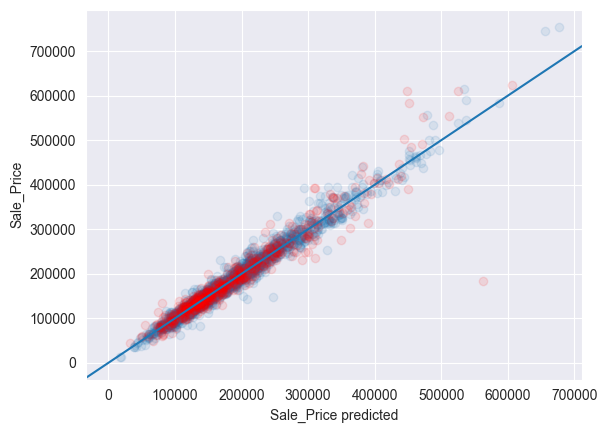

In [11]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Tuning dei parametri
Tramite la funzione *GridSearchCV* effettuiamo tuning dei parametri per tentare di migliorare il modello

In [12]:
params = {
    'n_estimators': [1000, 1500, 2000, 2500],
    'max_depth': [1, 3, 6],
    'min_child_weight': [1, 2, 3],
    'scale_pos_weight': [1, 2, 3]
}

gsearch = GridSearchCV(
    estimator=XGBRegressor(
        learning_rate=.05,
        gamma=0,
        subsample=0.65,
        colsample_bytree=0.46,
        reg_alpha=0.464,
        reg_lambda=0.8571,
        random_state=7,
        # Use GPU Accelerator
        tree_method='gpu_hist',
        gpu_id=0,
        n_jobs=-1,
        nthread=-1),
    param_grid=params,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5
)

gsearch.fit(X_train[FS_RF], Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=0.46,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.05, max_bin...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=-1, nthread=-1,
                                    num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 6], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [1000, 1500, 2000, 2500],
                         'scale_pos_weight': [1, 2, 3]},
             scoring='neg_mean_squared_error')

In [13]:
test_pre = gsearch.predict(X_test[FS_RF])
train_pre = gsearch.predict(X_train[FS_RF])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 82954342.098
Test MSE: 597959677.773
Train R^2: 0.986
Test R^2: 0.925


Il modello sembra migliorare lievemente